In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine


import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
housing_df = pd.read_sql_query('select * from houseprices',con=engine)


engine.dispose()

In [2]:
#Create dummies for the categorical features

housing_df = pd.concat([housing_df,pd.get_dummies(housing_df.kitchenqual, prefix='kitchenqual', drop_first=True)], axis=1)
housing_df = pd.concat([housing_df,pd.get_dummies(housing_df.exterqual, prefix='exterqual', drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(housing_df.kitchenqual, prefix='kitchenqual', drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(housing_df.exterqual, prefix='exterqual', drop_first=True).columns)

In [3]:
#Setting variables for model 1
X = housing_df[['overallqual', 'grlivarea', 'garagecars'] + dummy_column_names]
Y = housing_df.saleprice

In [4]:
#Splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [5]:
# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     426.0
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:19:41   Log-Likelihood:                -13974.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1158   BIC:                         2.802e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.136e+04   1.28e+04      4.022      0.000    2.63e+04    7.64e+04
overallqual     1.813e+04   1413.778     12.821      0.000    1.54e+04    2.09e+04
grlivarea         46.7485      2.744     17.036      0.000      41.365      52.132
garagecars      1.956e+04   1980.570      9.875      0.000    1.57e+04    2.34e+04
kitchenqual_Fa -4.967e+04   9669.349     -5.137      0.000   -6.86e+04   -3.07e+04
kitchenqual_Gd -3.803e+04   5716.707     -6.653      0.000   -4.92e+04   -2.68e+04
kitchenqual_TA -4.816e+04   6482.802     -7.429      0.000   -6.09e+04   -3.54e+04
exterqual_Fa   -5.145e+04   1.53e+04     -3.353      0.001   -8.16e+04   -2.13e+04
exterqual_Gd   -3.946e+04   7337.455     -5.378      0.000   -5.39e+04   -2.51e+04
exterqual_TA   -5.129e+04   8097.138     -6.335      0.000   -6.72e+04   -3.54e+04
==============================================================================
Omnibus:                      303.407   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19720.440
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                      23.129   Cond. No.                     2.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

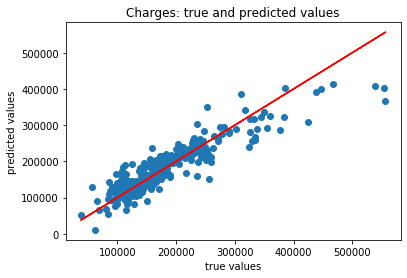

Mean absolute error of the prediction is: 24756.91136492904
Mean squared error of the prediction is: 1214633193.8996809
Root mean squared error of the prediction is: 34851.58811158655
Mean absolute percentage error of the prediction is: 15.016854006557972


In [6]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


### Model 1

#### Goodness of Fit of Train Set
R-square = 0.768 <br>
Adjusted R-square = 0.766 <br>
F-stat = 426.0, p-value = 0 <br>
AIC = 27920 <br>
BIC = 28020 <br><br>

In [7]:
#Setting additional variables for model 2: garagearea and mszoning
housing_df = pd.concat([housing_df,pd.get_dummies(housing_df.mszoning, prefix='mszoning', drop_first=True)], axis=1)
dummy_column_names = dummy_column_names + list(pd.get_dummies(housing_df.mszoning, prefix='mszoning', drop_first=True).columns)

X = housing_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea'] + dummy_column_names]
Y = housing_df.saleprice

In [8]:
#Splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
results.summary()

The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     295.3
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:19:42   Log-Likelihood:                -13938.
No. Observations:                1168   AIC:                         2.791e+04
Df Residuals:                    1153   BIC:                         2.798e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.343e+04   1.71e+04      1.374      0.170      -1e+04    5.69e+04
overallqual     1.781e+04   1387.429     12.835      0.000    1.51e+04    2.05e+04
grlivarea         45.6389      2.691     16.958      0.000      40.359      50.919
garagecars      1.047e+04   3234.383      3.238      0.001    4127.018    1.68e+04
garagearea        31.1008     10.976      2.834      0.005       9.567      52.635
kitchenqual_Fa -4.701e+04   9424.676     -4.988      0.000   -6.55e+04   -2.85e+04
kitchenqual_Gd -3.687e+04   5584.387     -6.603      0.000   -4.78e+04   -2.59e+04
kitchenqual_TA -4.639e+04   6317.296     -7.344      0.000   -5.88e+04    -3.4e+04
exterqual_Fa   -4.196e+04   1.51e+04     -2.779      0.006   -7.16e+04   -1.23e+04
exterqual_Gd   -3.886e+04   7141.747     -5.442      0.000   -5.29e+04   -2.49e+04
exterqual_TA   -5.061e+04   7883.728     -6.420      0.000   -6.61e+04   -3.51e+04
mszoning_FV     2.432e+04   1.39e+04      1.746      0.081   -3007.289    5.16e+04
mszoning_RH     2.021e+04   1.63e+04      1.241      0.215   -1.17e+04    5.22e+04
mszoning_RL     3.515e+04   1.29e+04      2.732      0.006    9903.744    6.04e+04
mszoning_RM     1.156e+04   1.31e+04      0.885      0.377   -1.41e+04    3.72e+04
==============================================================================
Omnibus:                      331.437   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31440.489
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                      28.417   Cond. No.                     4.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

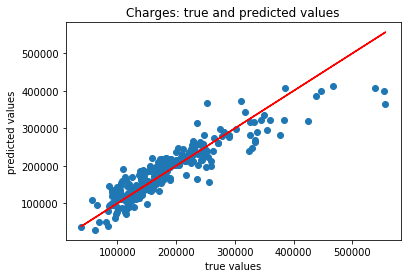

Mean absolute error of the prediction is: 23730.547509618766
Mean squared error of the prediction is: 1152560567.385907
Root mean squared error of the prediction is: 33949.382430110665
Mean absolute percentage error of the prediction is: 14.091598516328277


In [9]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Model 2

#### Goodness of Fit of Train Set
R-square = 0.782 <br>
Adjusted R-square = 0.779 <br>
F-stat = 295.3, p-value = 0 <br>
AIC = 27971 <br>
BIC = 27980 <br><br>


In [10]:
#Setting additional variables for model 3: interaction term between overall qual and first floor square feet
housing_df['int_overallqual_firstflrsf'] = housing_df.overallqual * housing_df.firstflrsf
X = housing_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'int_overallqual_firstflrsf', 'firstflrsf'] + dummy_column_names]
Y = housing_df.saleprice

In [11]:
#Running regression model 3

#Splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
results.summary()

The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     266.7
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:19:42   Log-Likelihood:                -13922.
No. Observations:                1168   AIC:                         2.788e+04
Df Residuals:                    1151   BIC:                         2.796e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.415e+04   1.95e+04      1.752      0.080   -4103.025    7.24e+04
overallqual                  1.26e+04   2504.088      5.032      0.000    7687.425    1.75e+04
grlivarea                     40.3486      2.836     14.229      0.000      34.785      45.912
garagecars                  1.326e+04   3272.085      4.052      0.000    6838.496    1.97e+04
garagearea                    15.1374     11.232      1.348      0.178      -6.900      37.175
int_overallqual_firstflrsf     4.1660      1.858      2.243      0.025       0.521       7.811
firstflrsf                    -8.9107     13.214     -0.674      0.500     -34.837      17.015
kitchenqual_Fa             -4.435e+04   9328.686     -4.754      0.000   -6.27e+04    -2.6e+04
kitchenqual_Gd             -3.301e+04   5618.422     -5.875      0.000    -4.4e+04    -2.2e+04
kitchenqual_TA             -4.291e+04   6322.184     -6.787      0.000   -5.53e+04   -3.05e+04
exterqual_Fa               -3.459e+04    1.5e+04     -2.310      0.021    -6.4e+04   -5208.565
exterqual_Gd               -3.049e+04   7364.094     -4.141      0.000   -4.49e+04    -1.6e+04
exterqual_TA               -4.114e+04   8143.345     -5.052      0.000   -5.71e+04   -2.52e+04
mszoning_FV                 2.995e+04   1.38e+04      2.163      0.031    2777.557    5.71e+04
mszoning_RH                 2.053e+04   1.61e+04      1.272      0.204   -1.11e+04    5.22e+04
mszoning_RL                 3.378e+04   1.28e+04      2.641      0.008    8683.180    5.89e+04
mszoning_RM                 1.245e+04   1.29e+04      0.963      0.336   -1.29e+04    3.78e+04
==============================================================================
Omnibus:                      539.971   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68582.203
Skew:                          -1.101   Prob(JB):                         0.00
Kurtosis:                      40.475   Cond. No.                     2.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

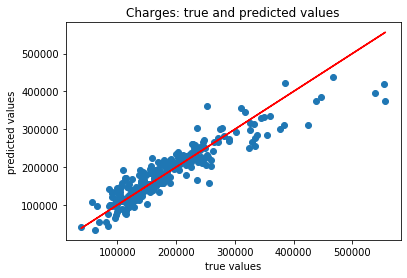

Mean absolute error of the prediction is: 22740.087031692125
Mean squared error of the prediction is: 1064352182.5503323
Root mean squared error of the prediction is: 32624.41083836354
Mean absolute percentage error of the prediction is: 13.513311761399773


In [12]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Model 3

#### Goodness of Fit of Train Set
R-square = 0.788 <br>
Adjusted R-square = 0.785 <br>
F-stat = 266.7, p-value = 0 <br>
AIC = 27880 <br>
BIC = 27960 <br><br>

Based on Goodness of Fit on the train set, the best model is Model 3.  This model explains the most variance compared to the other two and has the lowest AIC and BIC scores.  

#### Best performing model - Test set

Model 1: <br>
Mean absolute error of the prediction is: 24756.91136492904 <br>
Mean squared error of the prediction is: 1214633193.8996809 <br>
Root mean squared error of the prediction is: 34851.58811158655 <br>
Mean absolute percentage error of the prediction is: 15.016854006557972 <br> <br>

Model 2:<br>
Mean absolute error of the prediction is: 23730.547509618766 <br>
Mean squared error of the prediction is: 1152560567.385907 <br>
Root mean squared error of the prediction is: 33949.382430110665 <br>
Mean absolute percentage error of the prediction is: 14.091598516328277 <br> <br>


Model 3: <br>
Mean absolute error of the prediction is: 22740.087031692125 <br>
Mean squared error of the prediction is: 1064352182.5503323 <br> 
Root mean squared error of the prediction is: 32624.41083836354 <br>
Mean absolute percentage error of the prediction is: 13.513311761399773 <br> <br>

Based on the evaluation metrics above, Model 3 is the best performing model.  Every metric performs better than the corresponding metric in the other two models.  